In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [2]:

# get the stock market data of Tesla from a .csv-file:
df01 = pd.read_csv("Tesla.csv")


In [3]:

df01


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [4]:

# Open --> opening price of the stocks on a particular day
# Close --> closing price of the stocks on a particular day
# High --> highest price for the stock on a particular day
# Low --> lowest price for the stock on a particular day
# Volume --> total volume of stocks traded on a particular day
# Volume Weighted Average Price (VWAP) --> is a trading benchmark used by traders that gives the average price
#                                          a security has traded at throughout the day, based on both volume and price.
#                                          It is important because it provides traders with insight into both
#                                          the trend and value of a security
# Adj. Close --> closing price after dividend payouts, stock splits, or the issue of additional shares have been taken into account


In [5]:

# no null-values to control:
df01.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:

# check duplicates:
df01["Date"].value_counts().head(10)


Date
6/29/2010     1
11/25/2014    1
12/31/2014    1
12/30/2014    1
12/29/2014    1
12/26/2014    1
12/24/2014    1
12/23/2014    1
12/22/2014    1
12/19/2014    1
Name: count, dtype: int64

In [7]:

# convert to an date-format:
df01.Date = pd.to_datetime(df01.Date,format='%m/%d/%Y')


In [8]:

df01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [9]:

df01.describe()



,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


In [10]:

# get the data for the first year:
df01[df01.Date == "6/28/2011"]


,Date,Open,High,Low,Close,Volume,Adj Close
252,2011-06-28,27.790001,28.25,27.67,28.110001,889200,28.110001


In [11]:

df02 = df01.iloc[:253,:]


In [12]:

# first year data set:
df02


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
248,2011-06-22,27.370001,28.250000,27.100000,27.209999,1475600,27.209999
249,2011-06-23,27.200001,27.719999,26.209999,27.709999,1170000,27.709999
250,2011-06-24,27.639999,27.969999,27.260000,27.570000,3608500,27.570000
251,2011-06-27,27.730000,28.280001,27.309999,27.459999,1809400,27.459999


Text(0.5, 0, 'Date')

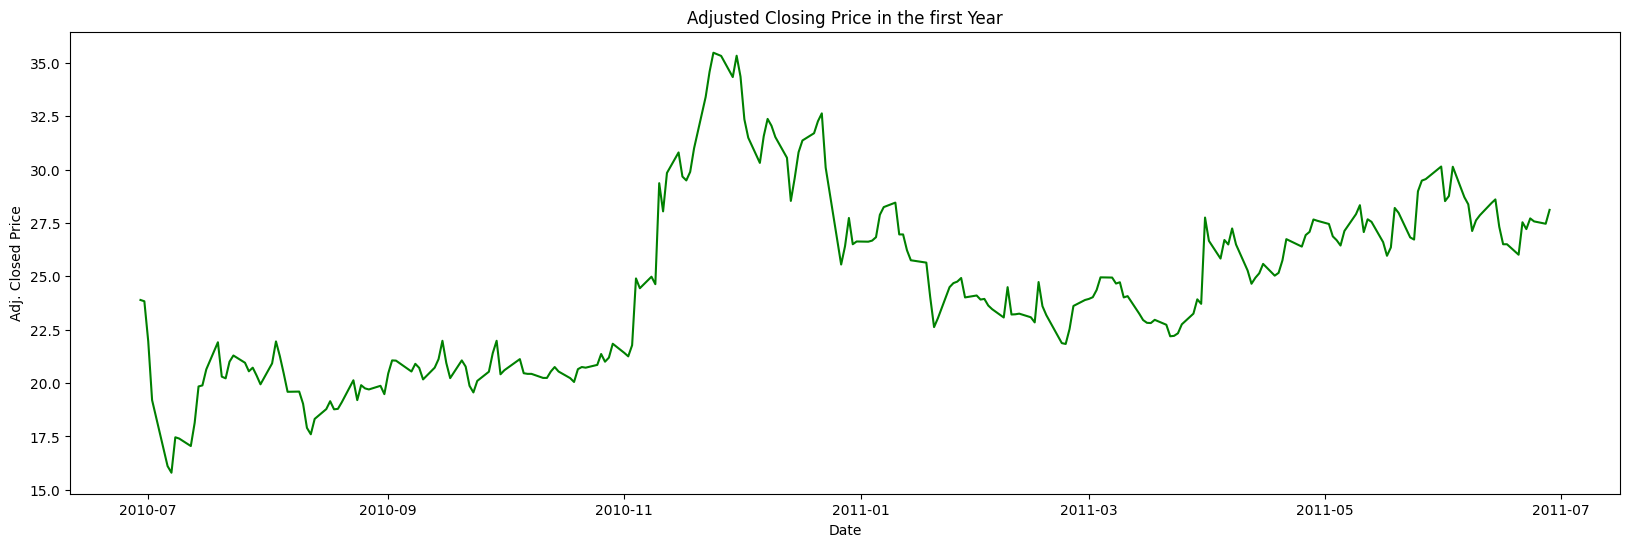

In [13]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df02.Date,df02["Adj Close"],"g")
plt.title("Adjusted Closing Price in the first Year")
plt.ylabel("Adj. Closed Price")
plt.xlabel("Date")


Text(0.5, 0, 'Date')

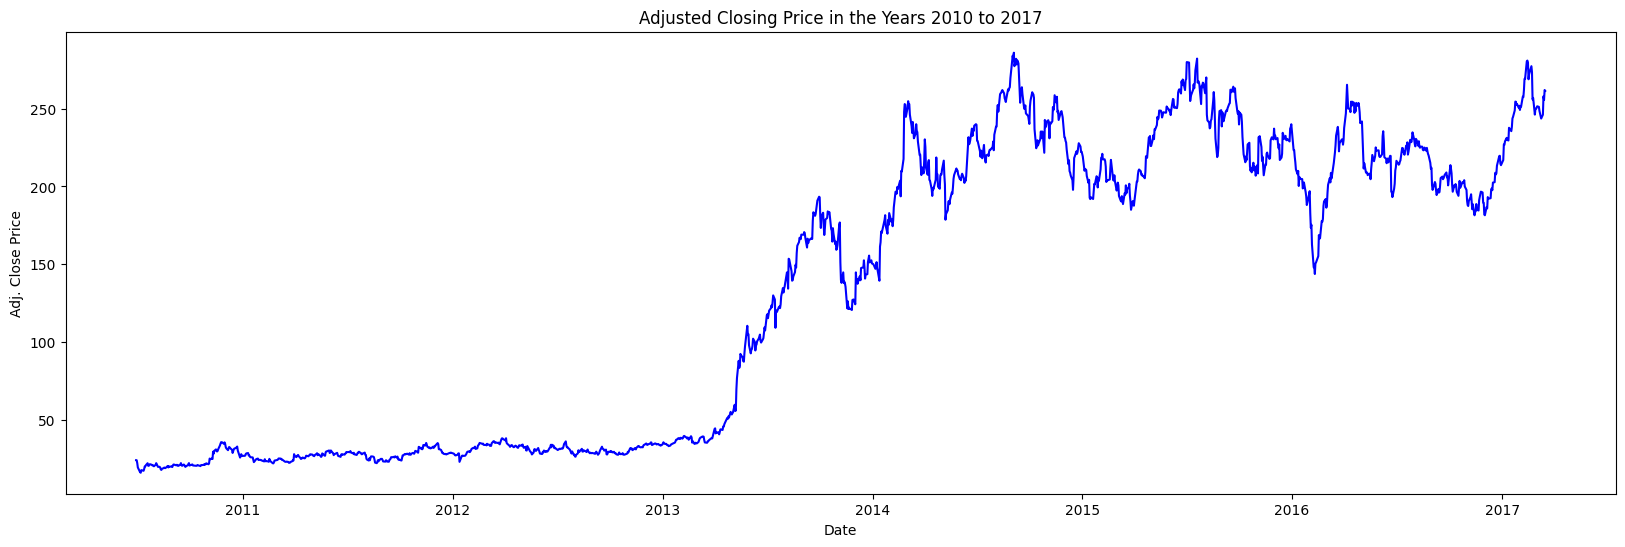

In [14]:

# visualization:
plt.figure(figsize=(20,6))
plt.plot(df01.Date,df01["Adj Close"],"b")
plt.title("Adjusted Closing Price in the Years 2010 to 2017")
plt.ylabel("Adj. Close Price")
plt.xlabel("Date")


<Axes: xlabel='Adj Close', ylabel='Density'>

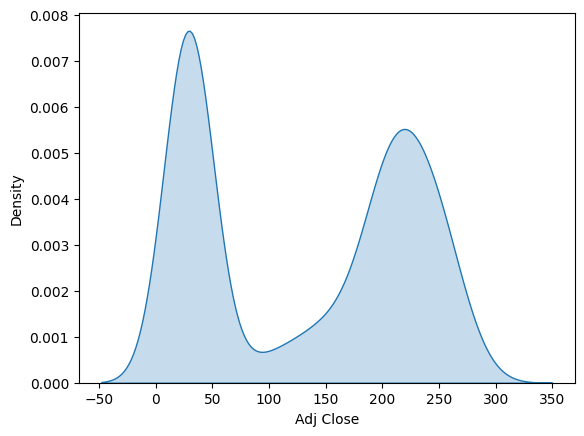

In [15]:

# Visualising using KDEs:
# Summarizing the data with Density plots to see where the mass of the data is located
sns.kdeplot(df01["Adj Close"],shade=True)


# analyzing with sclicing and visualization

In [16]:

#  a subsetting of the data to analyse it combined with the time series
df_Adj_Close = df01[["Date","Adj Close"]]
df_Adj_Close["Date"] = df_Adj_Close["Date"].apply(pd.to_datetime)
df_Adj_Close.set_index('Date',inplace=True)
df_Adj_Close.head(7)


,Adj Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
2010-07-07,15.800000
2010-07-08,17.459999


In [17]:

# slicing on year:
df_Adj_Close_sub = df_Adj_Close['2010':'2017']
# slicing on month:
df_Adj_Close_sub = df_Adj_Close['2010-06':'2017-03']
# sclicing on day:
df_Adj_Close_sub = df_Adj_Close['2010-06-29':'2017-03-17']


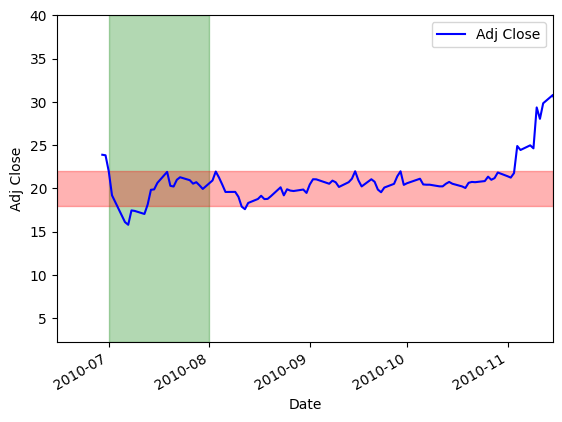

In [18]:

# visualization with markers first month:
ax = df_Adj_Close_sub.plot(color='b',fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_xlim(xmax='2010-11-15',xmin='2010-06-15')
ax.set_ylim(ymax=40)

ax.axvspan('2010-07-01','2010-08-01', color='g', alpha=0.3)
ax.axhspan(18,22, color='r',alpha=0.3)

plt.show()


In [19]:

# values from the fluctuations of 'Close' and 'Open' in a new feature
df01["Close_Open_Diff"]= df01.Open - df01.Close


In [20]:
df01[["Date","Close_Open_Diff"]].head()

,Date,Close_Open_Diff
0,2010-06-29,-4.889999
1,2010-06-30,1.960001
2,2010-07-01,3.040001
3,2010-07-02,3.799999
4,2010-07-06,3.889999


In [21]:

#  a subsetting of the data to analyse it combined with the time series
# --> values from the fluctuation of 'Close' and 'Open':

df_Close_Open_Diff = df01[["Date","Close_Open_Diff"]]
df_Close_Open_Diff["Date"] = df_Close_Open_Diff["Date"].apply(pd.to_datetime)
df_Close_Open_Diff.set_index('Date',inplace=True)
df_Close_Open_Diff.head()


,Close_Open_Diff
Date,
2010-06-29,-4.889999
2010-06-30,1.960001
2010-07-01,3.040001
2010-07-02,3.799999
2010-07-06,3.889999


In [22]:

# slicing on year:
df_Close_Open_Diff_sub = df_Close_Open_Diff['2010':'2017']
# slicing on month:
df_Close_Open_Diff_sub = df_Close_Open_Diff['2010-06':'2017-03']
# sclicing on day:
df_Close_Open_Diff_sub = df_Close_Open_Diff['2010-06-29':'2017-03-17']


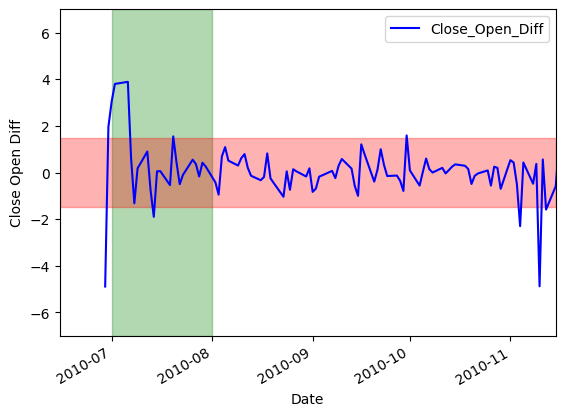

In [23]:

# visualization with markers first month:
ax = df_Close_Open_Diff_sub.plot(color='b',fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('Close Open Diff')
ax.set_xlim(xmax='2010-11-15',xmin='2010-06-15')
ax.set_ylim(ymax=7,ymin=-7)

ax.axvspan('2010-07-01','2010-08-01', color='g', alpha=0.3)
ax.axhspan(-1.5,1.5, color='r',alpha=0.3)

plt.show()


In [24]:

# values from the fluctuation of 'High' and 'Low' in a new feature
df01["High_Low_Diff"]= df01.High - df01.Low


In [25]:
df01[["Date","High_Low_Diff"]].head()

,Date,High_Low_Diff
0,2010-06-29,7.459999
1,2010-06-30,7.120001
2,2010-07-01,5.650000
3,2010-07-02,4.390001
4,2010-07-06,4.170000


In [26]:

#  a subsetting of the data to analyse it combined with the time series
# --> values from the fluctuation of 'High' and 'Low':

df_High_Low_Diff = df01[["Date","High_Low_Diff"]]
df_High_Low_Diff["Date"] = df_High_Low_Diff["Date"].apply(pd.to_datetime)
df_High_Low_Diff.set_index('Date',inplace=True)
df_High_Low_Diff.head()


,High_Low_Diff
Date,
2010-06-29,7.459999
2010-06-30,7.120001
2010-07-01,5.650000
2010-07-02,4.390001
2010-07-06,4.170000


In [27]:

# slicing on year:
df_High_Low_Diff_sub = df_High_Low_Diff['2010':'2017']
# slicing on month:
df_High_Low_Diff_sub = df_High_Low_Diff['2010-06':'2017-03']
# sclicing on day:
df_High_Low_Diff_sub = df_High_Low_Diff['2010-06-29':'2017-03-17']


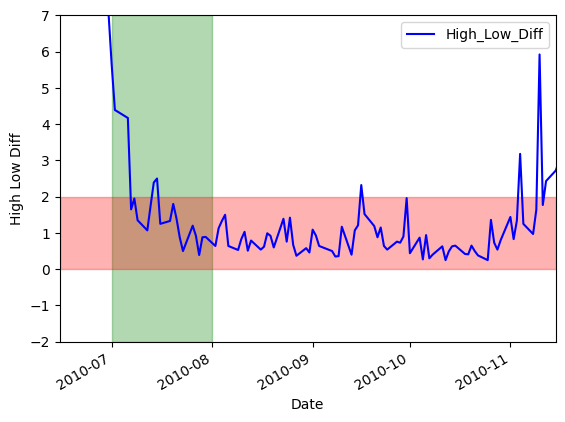

In [28]:

# visualization with markers first month:
ax = df_High_Low_Diff_sub.plot(color='b',fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('High Low Diff')
ax.set_xlim(xmax='2010-11-15',xmin='2010-06-15')
ax.set_ylim(ymax=7,ymin=-2)

ax.axvspan('2010-07-01','2010-08-01', color='g', alpha=0.3)
ax.axhspan(0,2, color='r',alpha=0.3)

plt.show()


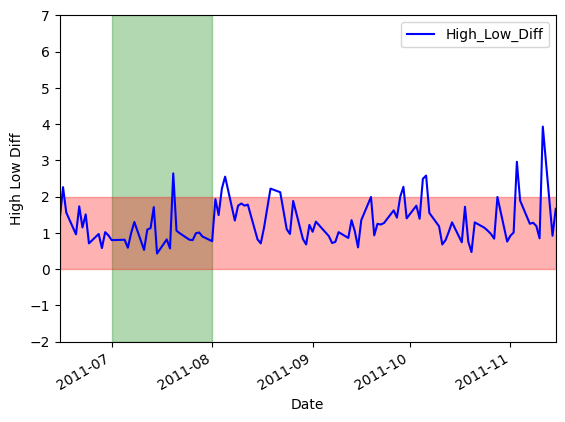

In [29]:

# visualization with markers first month after one Year:
ax = df_High_Low_Diff_sub.plot(color='b',fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('High Low Diff')
ax.set_xlim(xmax='2011-11-15',xmin='2011-06-15')
ax.set_ylim(ymax=7,ymin=-2)

ax.axvspan('2011-07-01','2011-08-01', color='g', alpha=0.3)
ax.axhspan(0,2, color='r',alpha=0.3)

plt.show()


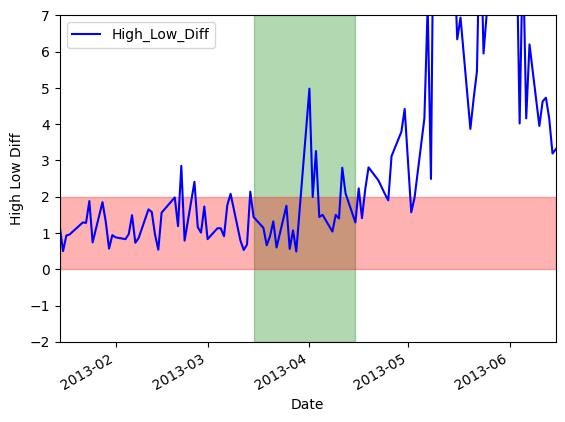

In [30]:

# visualization with markers first month after 2.5 Years:
ax = df_High_Low_Diff_sub.plot(color='b',fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('High Low Diff')
ax.set_xlim(xmax='2013-06-15',xmin='2013-01-15')
ax.set_ylim(ymax=7,ymin=-2)

ax.axvspan('2013-03-15','2013-04-15', color='g', alpha=0.3)
ax.axhspan(0,2, color='r',alpha=0.3)

plt.show()


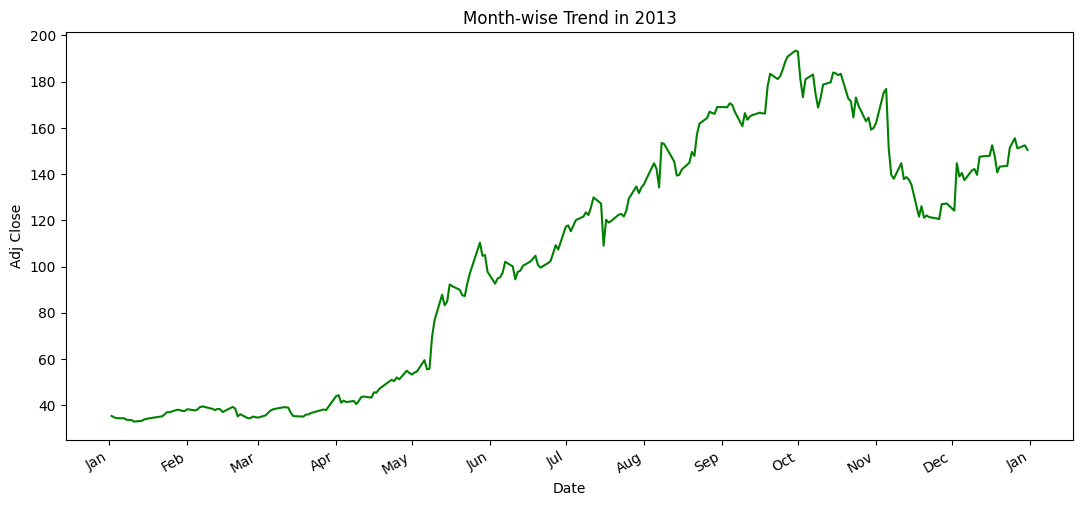

In [31]:

# get the trend month-wise in one year:
# for that i need the library 'matplotlib.dates':
ax = df_Adj_Close.loc['2013', 'Adj Close'].plot(figsize=(13,6),color='g')
ax.set_title('Month-wise Trend in 2013') 
ax.set_ylabel('Adj Close')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


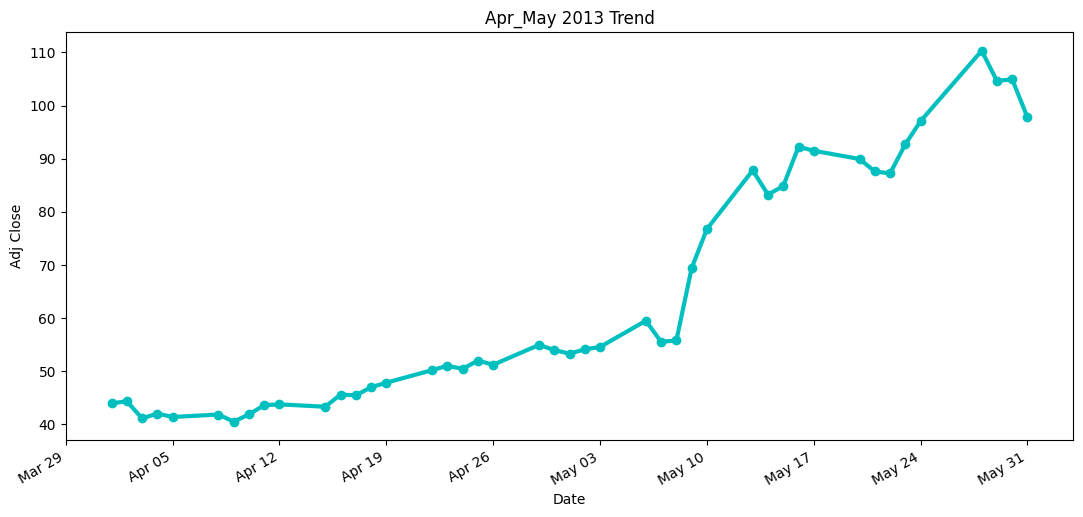

In [32]:

# trends in detail at the end of a week:
ax = df_Adj_Close.loc['2013-04':'2013-05','Adj Close'].plot(color='c',marker='o', linestyle='-',linewidth=3,figsize=(13,6))
ax.set_title('Apr_May 2013 Trend') 
ax.set_ylabel('Adj Close')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.FRIDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))



# time resampling


In [33]:
# for research --> pandas docu:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [34]:

# splitting the date feature into multiple:
df_Adj_Close.reset_index(inplace=True)
df_Adj_Close['Year'] = df_Adj_Close.Date.dt.year
df_Adj_Close['Month'] = df_Adj_Close.Date.dt.month
df_Adj_Close['Day'] = df_Adj_Close.Date.dt.day
df_Adj_Close['Day of Week'] = df_Adj_Close.Date.dt.dayofweek
df_Adj_Close['Weekday Name'] = df_Adj_Close.Date.dt.day_name()

# Date feature becomes index:
df_Adj_Close.set_index('Date',inplace=True)
df_Adj_Close.head()


,Adj Close,Year,Month,Day,Day of Week,Weekday Name
Date,,,,,,
2010-06-29,23.889999,2010,6,29,1,Tuesday
2010-06-30,23.830000,2010,6,30,2,Wednesday
2010-07-01,21.959999,2010,7,1,3,Thursday
2010-07-02,19.200001,2010,7,2,4,Friday
2010-07-06,16.110001,2010,7,6,1,Tuesday


In [35]:

# use time resample-functions to get prepared data to see trends
# (before i remove the weekday_names to have only numbers in my data)
# f.e. average price at the end of the year:
df_Adj_Close_res_y = df_Adj_Close.iloc[:,:5].resample(rule='YE').mean()


In [36]:
df_Adj_Close_res_y[:5]

,Adj Close,Year,Month,Day,Day of Week
Date,,,,,
2010-12-31,23.341846,2010.0,9.453846,16.030769,2.023077
2011-12-31,26.804762,2011.0,6.547619,15.634921,2.035714
2012-12-31,31.168600,2012.0,6.500000,15.776000,2.036000
2013-12-31,104.401230,2013.0,6.543651,15.650794,2.015873
2014-12-31,223.329088,2014.0,6.551587,15.761905,2.007937


Text(0.5, 0, 'Date')

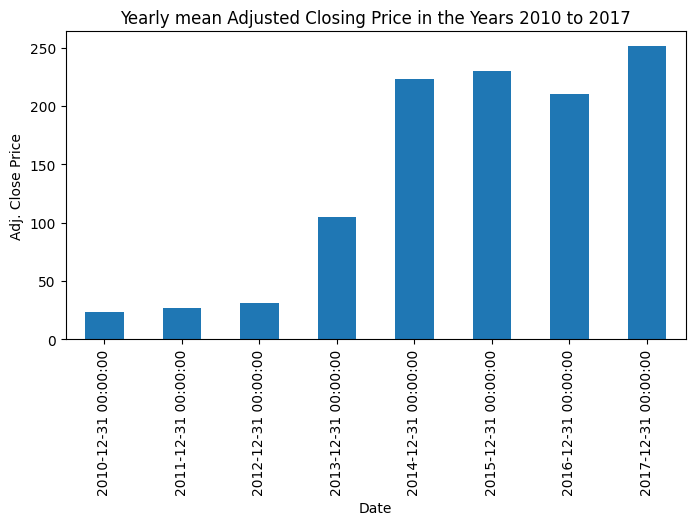

In [37]:

# visualization
plt.rcParams['figure.figsize'] = (8,4)
df_Adj_Close_res_y['Adj Close'].plot(kind='bar')
plt.title("Yearly mean Adjusted Closing Price in the Years 2010 to 2017")
plt.ylabel("Adj. Close Price")
plt.xlabel("Date")


In [38]:

# use time resample-functions to get prepared data to see trends
# (before i remove the weekday_names to have only numbers in my data)
# f.e. average price at the end of the month:
df_Adj_Close_res_m = df_Adj_Close.iloc[:,:5].resample(rule='ME').mean()


In [39]:

df_Adj_Close_res_m[df_Adj_Close_res_m.Year == 2013.0][:5]


,Adj Close,Year,Month,Day,Day of Week
Date,,,,,
2013-01-31,35.188571,2013.0,1.0,16.476190,2.142857
2013-02-28,37.366316,2013.0,2.0,14.947368,2.105263
2013-03-31,37.043000,2013.0,3.0,15.100000,2.000000
2013-04-30,46.235455,2013.0,4.0,14.954545,1.863636
2013-05-31,81.399091,2013.0,5.0,15.863636,2.227273


Text(0.5, 0, 'Month')

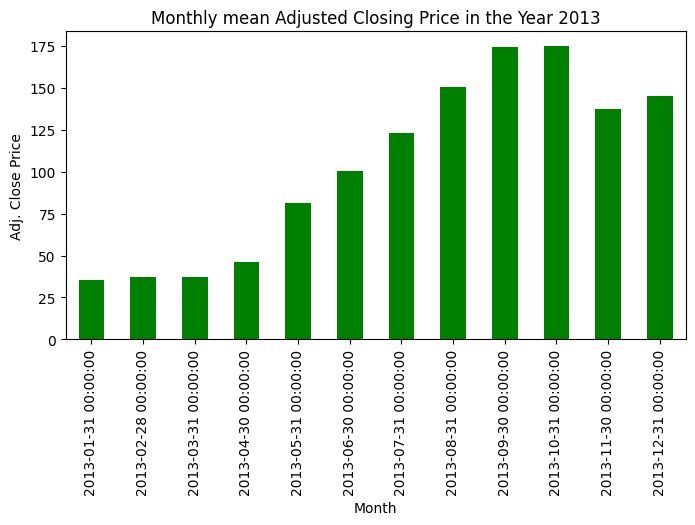

In [40]:

# visualization
plt.rcParams['figure.figsize'] = (8,4)
df_Adj_Close_res_m[df_Adj_Close_res_m.Year == 2013.0]['Adj Close'].plot(kind='bar',color='g')
plt.title("Monthly mean Adjusted Closing Price in the Year 2013")
plt.ylabel("Adj. Close Price")
plt.xlabel("Month")


In [41]:

# use time resample-functions to get prepared data to see trends
# (before i remove the weekday_names to have only numbers in my data)
# f.e. average price at the end of the week:
df_Adj_Close_res_w = df_Adj_Close.iloc[:,:5].resample(rule='W').mean()


In [42]:

df_Adj_Close_res_w[(df_Adj_Close_res_w.Year == 2013.0) & (df_Adj_Close_res_w.Month >= 10.0)][:5]


,Adj Close,Year,Month,Day,Day of Week
Date,,,,,
2013-10-13,175.641998,2013.0,10.0,9.0,2.0
2013-10-20,182.684000,2013.0,10.0,16.0,2.0
2013-10-27,170.289999,2013.0,10.0,23.0,2.0
2013-11-03,161.732001,2013.0,10.2,23.8,2.0
2013-11-10,156.178000,2013.0,11.0,6.0,2.0


Text(0.5, 0, 'Weeks Oct. to Dec.')

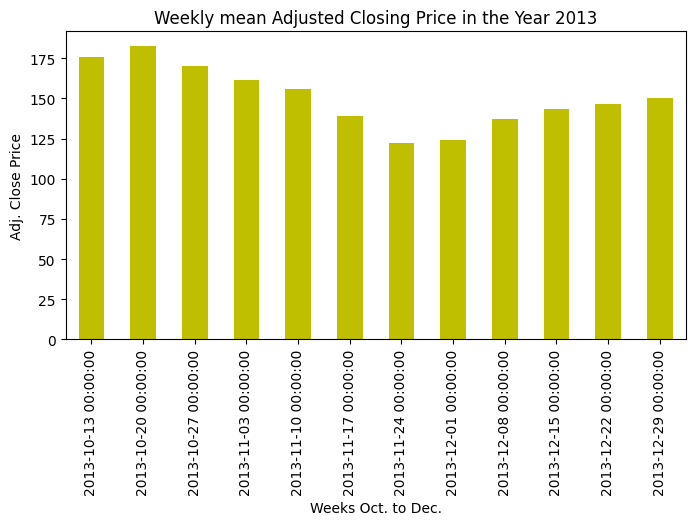

In [43]:

# visualization
plt.rcParams['figure.figsize'] = (8,4)
df_Adj_Close_res_w[(df_Adj_Close_res_w.Year == 2013.0) & (df_Adj_Close_res_w.Month >= 10.0)]['Adj Close'].plot(kind='bar',color='y')
plt.title("Weekly mean Adjusted Closing Price in the Year 2013")
plt.ylabel("Adj. Close Price")
plt.xlabel("Weeks Oct. to Dec.")


In [44]:

# use time resample-functions to get prepared data to see trends
# (before i remove the weekday_names to have only numbers in my data)
# f.e. average price at the end of the day:
df_Adj_Close_res_d = df_Adj_Close.iloc[:,:5].resample(rule='B').mean()


In [45]:

df_Adj_Close_res_d[(df_Adj_Close_res_d.Year == 2013.0) & (df_Adj_Close_res_d.Month == 10.0)][:5]


,Adj Close,Year,Month,Day,Day of Week
Date,,,,,
2013-10-01,193.000000,2013.0,10.0,1.0,1.0
2013-10-02,180.949997,2013.0,10.0,2.0,2.0
2013-10-03,173.309998,2013.0,10.0,3.0,3.0
2013-10-04,180.979996,2013.0,10.0,4.0,4.0
2013-10-07,183.070007,2013.0,10.0,7.0,0.0


Text(0.5, 0, 'Days in Oct.')

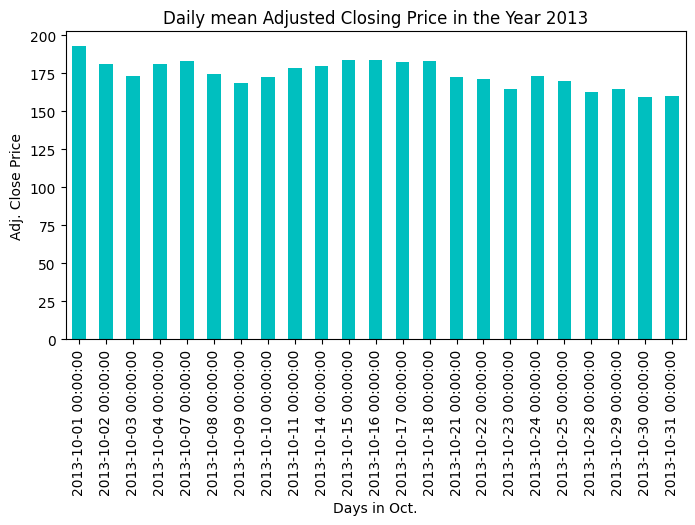

In [46]:

# visualization
plt.rcParams['figure.figsize'] = (8,4)
df_Adj_Close_res_d[(df_Adj_Close_res_d.Year == 2013.0) & (df_Adj_Close_res_d.Month == 10.0)]['Adj Close'].plot(kind='bar',color='c')
plt.title("Daily mean Adjusted Closing Price in the Year 2013")
plt.ylabel("Adj. Close Price")
plt.xlabel("Days in Oct.")
